# **Task C1** 
## Analyzing the Avocado Data

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">




### A. Instructions

1. Make sure you have completed Task P1 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM on the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

### B. Write Python code that performs (answers) the following operations (questions) 

In [37]:
import pandas as pd

##### 1. Read the data from the CSV file into a DataFrame.

In [38]:
# write your code here
file = pd.read_csv("avocado.csv")
data = file.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


##### 2. Multiply the Total Volume and AveragePrice columns, and store the result in a new column called EstimatedRevenue. Then, calculate the EstimatedRevenue for each region, sort the resulting data in descending order by EstimatedRevenue, and display the top 5 regions, except TotalUS, with the highest EstimatedRevenue.

* Hint: the estimated revenue of region x = sum of the estimated revenues in region x

In [39]:
# write your code here
# multiply the Total Volume and AveragePrice columns to create a new column called EstimatedRevenue
data["EstimatedRevenue"] = data["Total Volume"] * data["AveragePrice"]
# group the data by region and calculate the total estimated revenue for each region 
grouped = data.groupby("region")["EstimatedRevenue"].sum().reset_index()
# ecxlude TotalUS
grouped = grouped[grouped["region"] != "TotalUS"]



# sort the data in descending order by EstimatedRevenue and display the top 5 regions with the highest revenue
grouped = grouped.sort_values(["EstimatedRevenue"], ascending=False)
grouped.head()



,region,EstimatedRevenue
6,California,1.121414e+09
52,West,1.066834e+09
29,Northeast,9.600079e+08
45,SouthCentral,8.740593e+08
46,Southeast,7.036306e+08


##### 3. Create a bar plot that shows the mean, median, and standard deviation of the Total Volume of the organic avocados sold in the regions with the highest overall Total Volume from (including) 2017.

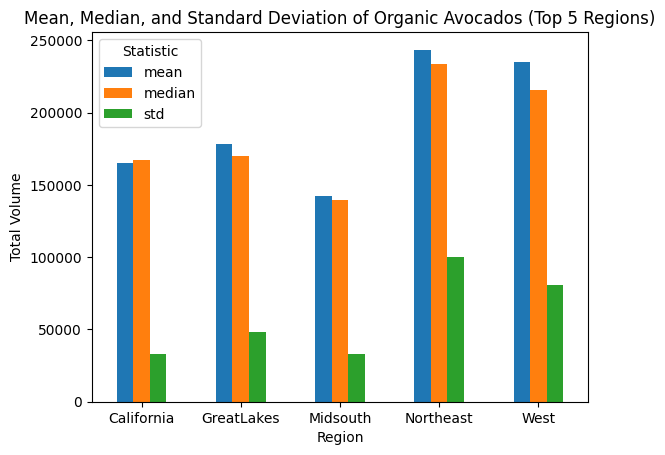

In [40]:
import matplotlib.pyplot as plt



avocado_data = data[(data['type'] == 'organic') & (data['year'] >= 2017) & (data['region'] != 'TotalUS')]

region_summary = avocado_data.groupby('region')['Total Volume'].agg(['sum', 'median', 'std'])

top_5_regions = region_summary.sort_values(by='sum', ascending=False).head(5)

top_regions_data = avocado_data[avocado_data['region'].isin(top_5_regions.index)]



region_stats = top_regions_data.groupby('region')['Total Volume'].agg(['mean', 'median', 'std'])


region_stats


region_stats.plot(kind='bar', y=['mean', 'median', 'std'], rot=0)


plt.xlabel("Region")
plt.ylabel("Total Volume")
plt.title("Mean, Median, and Standard Deviation of Organic Avocados (Top 5 Regions)")
plt.legend(title="Statistic")
plt.show()


##### 4. What is the mean and median of AveragePrice for each type of avocado (organic and conventional) in 2018? Be sure to include just the type, MeanPrice, and MedianPrice columns in the results.

In [41]:
# write your code here



df = data[((data["type"] == "organic") | (data["type"] == "conventional")) & (data["year"] == 2018)]



df = df.groupby("type")["AveragePrice"].agg(["mean", "median"])

df

,mean,median
type,,
conventional,1.127886,1.14
organic,1.567176,1.55


##### 5. Analyze the consistency of sales for Small Bags, Large Bags, XLarge Bags, and Total Bags of the top 3 avocado producing regions (excluding TotalUS) for each type of avocado over time. 

##### *To explain consistency of sales, use the coefficient of variation, which is a statistical measure used to determine the consistency or variability of a data set. It is calculated as the ratio of the standard deviation to the mean, expressed as a percentage. Higher values of the coefficient of variation indicate greater variability or inconsistency in the data, while lower values indicate more consistency in the data.* 

In [42]:
# Get the top 3 regions (excluding TotalUS) with the highest sum of Total Volume
df = data[data["region"] != "TotalUS"]
df = df.groupby(["region"])["Total Volume"].sum().reset_index()
df = df.sort_values("Total Volume", ascending=False)
df = df.head(3)

# Get the sales of Small Bags, Large Bags, XLarge Bags, and Total Bags for each region and type of avocado
filtered = data[data["region"].isin(df["region"])]
filtered = filtered.groupby(["region", "year", "type"])[["Small Bags", "Large Bags", "XLarge Bags", "Total Bags"]].sum().reset_index()

# Calculate the coefficient of variation for each region and bag type
cv = filtered.groupby(["region", "type"]).std() / filtered.groupby(["region", "type"]).mean()


# Display the results
cv



year  Small Bags  Large Bags  XLarge Bags  \
region       type                                                         
California   conventional  0.00064    0.583109    1.105039     0.840635   
             organic       0.00064    0.690845    1.073864          NaN   
SouthCentral conventional  0.00064    0.458171    0.666116     0.731524   
             organic       0.00064    0.675496    0.782929          NaN   
West         conventional  0.00064    0.628604    0.572329     0.536888   
             organic       0.00064    0.770922    0.530973     1.154749   

                           Total Bags  
region       type                      
California   conventional    0.591069  
             organic         0.706007  
SouthCentral conventional    0.494368  
             organic         0.673768  
West         conventional    0.593202  
             organic         0.596141

### C. Learn more
* https://www.statisticshowto.com/probability-and-statistics/how-to-find-a-coefficient-of-variation/